In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import category_encoders as ce


student_df = pd.read_csv('./data/student-mat.csv',delimiter=';')

In [2]:
print(student_df.shape)
print(student_df.describe())

(395, 33)
              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659

In [13]:
student_df['G3'].value_counts()

10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
20     1
4      1
Name: G3, dtype: int64

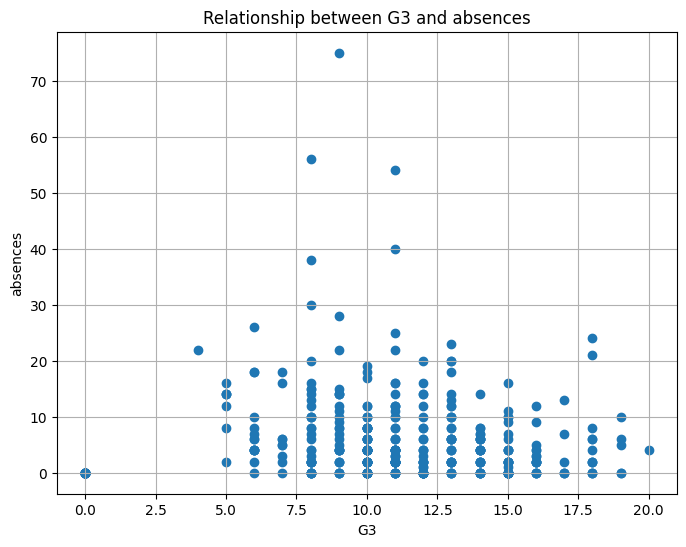

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(student_df['G3'], student_df['absences'], alpha=1.0)  
plt.title('Relationship between G3 and absences')  
plt.xlabel('G3')  
plt.ylabel('absences')  
plt.grid(True)  
plt.show()

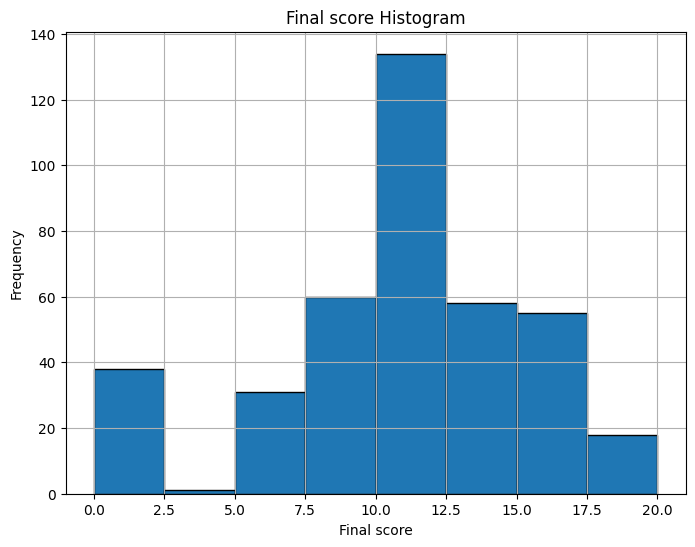

In [21]:
plt.figure(figsize=(8, 6))
plt.hist(student_df['G3'], bins=8, edgecolor='k')  
plt.title('Final score Histogram')  
plt.xlabel('Final score')  
plt.ylabel('Frequency') 
plt.grid(True) 

plt.show()

In [63]:
independent_vars = ['school', 'sex', 'age', 'address', 'studytime', 'absences', 'G1', 'G2']

# encoder = ce.OrdinalEncoder(cols=independent_vars)
# df = encoder.fit_transform(student_df)
encoder = ce.OrdinalEncoder(cols=['school', 'sex', 'address'])
df_encoded = encoder.fit_transform(student_df)

X = df_encoded[independent_vars]  
y = df_encoded['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [65]:
print('independent:',X_train)
print('Dependent:',y_train)

independent:      school  sex  age  address  studytime  absences  G1  G2
64        1    1   15        1          2         0  10  10
55        1    1   16        1          2         8   8   9
343       1    1   17        1          2         0   9   8
219       1    1   17        1          3         4   9  10
366       2    2   18        1          3         0  13  13
..      ...  ...  ...      ...        ...       ...  ..  ..
323       1    1   17        1          3         1  12  14
192       1    2   17        1          2        12   7   8
117       1    2   16        1          1         0  13  14
47        1    2   16        1          4         4  19  19
172       1    2   17        1          2         0  13  11

[316 rows x 8 columns]
independent:     school sex  age address  studytime  absences  G1  G2
64      GP   F   15       U          2         0  10  10
55      GP   F   16       U          2         8   8   9
343     GP   F   17       U          2         0   9   8
21

In [66]:
model = LinearRegression()
model.fit(X_train, y_train) 

print('Intercept', model.intercept_) 
print('Coefficient', model.coef_) 

Intercept 2.4932231592204737
Coefficient [ 0.61055595  0.20756336 -0.30691935 -0.08696631  0.05339717  0.05853222
  0.11524352  0.98535703]


In [67]:
coefficients = model.coef_.reshape(8,-1)
variables = np.array([['school', 'sex', 'age', 'address', 'studytime', 'absences', 'G1', 'G2']]).reshape(8,-1)

coeff = pd.DataFrame(coefficients, variables)

print(coeff)

                     0
(school,)     0.610556
(sex,)        0.207563
(age,)       -0.306919
(address,)   -0.086966
(studytime,)  0.053397
(absences,)   0.058532
(G1,)         0.115244
(G2,)         0.985357


In [68]:
y_pred = model.predict(X_test).round().astype(int)

In [69]:
result_df = pd.DataFrame({'Actual': y_test[:25], 'Predicted': y_pred[:25]})

print(result_df)

     Actual  Predicted
329      14         14
318      10         10
317       9          9
65       15         15
59       16         16
287      12         12
212      14         13
60       11         11
394       9          8
324      15         15
375      10          7
74       11         15
76       10         12
106       8          8
215      15         15
12       14         14
132      12         13
264       0          9
268      10          9
167      16         15
168       0          6
150       0          4
90        8          6
171      16         15
282      12         11


C:\Users\kiera\AppData\Local\Temp\ipykernel_1928\1425366346.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  result_df = pd.DataFrame({'Actual': y_test[:25], 'Predicted': y_pred[:25]})


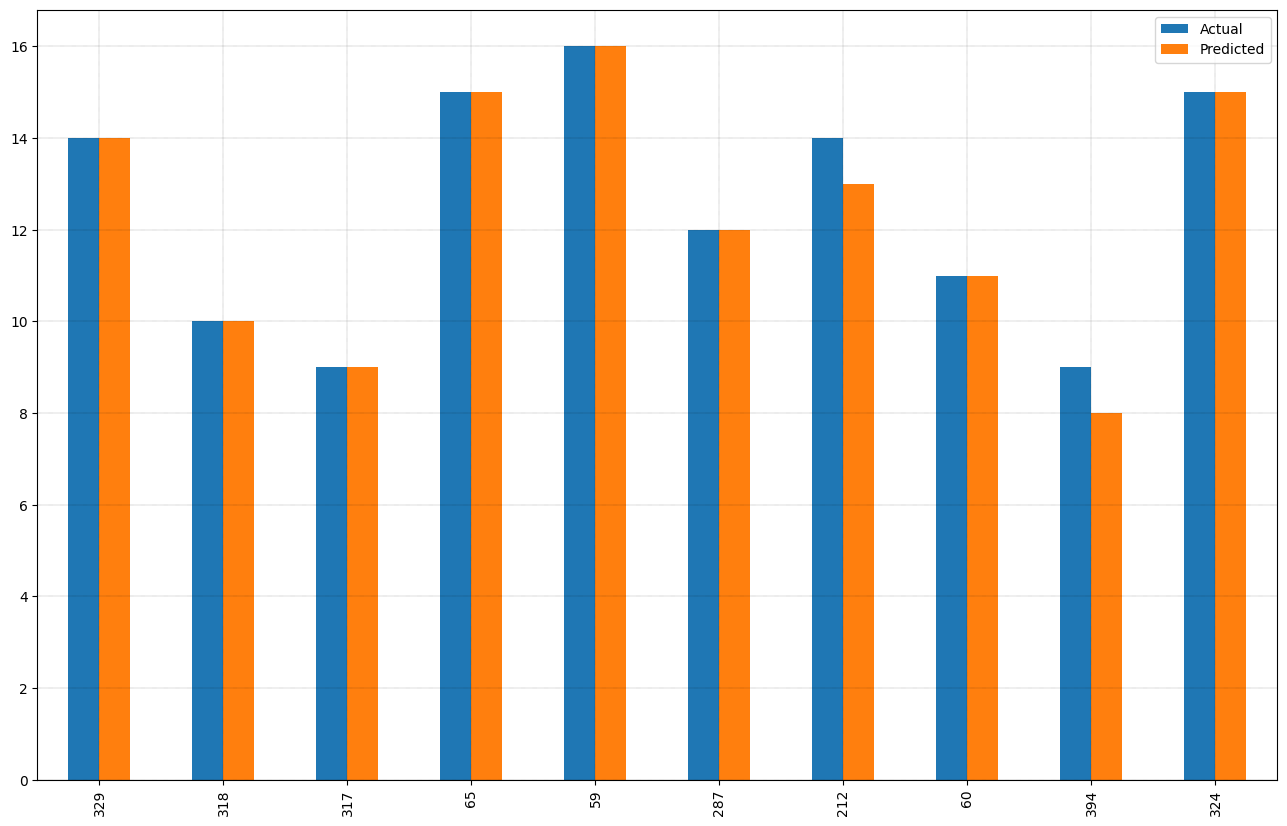

In [70]:
result10_df = result_df.head(10)
result10_df.plot(kind='bar', figsize=(16,10))
plt.grid(linestyle=':', linewidth='0.25', color='black')
plt.show()

In [71]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)

print("R² Value:", r_squared)

R² Value: 0.7912383408254058


In [83]:
new_student_features = {}
school = input('What school are you attending (For Gabriel Pereira insert GP, for Mousinho da Silveira insert MS): ').upper().strip()
sex = input('What sex are you (For female insert F, for male insert M): ').upper().strip()
age = input('How old are you: ')
address = input('Do you live in an urban (insert U) or a rural (insert R) neighboorhood: ').upper().strip()
studytime = input('How long do you study: ')
studytime = int(studytime)
absences = input('How manny times were you absent: ')
G1 = input('What was your first score: ')
G2 = input('What was your second score: ')

if school == 'GP':
    new_student_features['school'] = 1
elif school == 'MS':
    new_student_features['school'] = 2

if sex == 'F':
    new_student_features['sex'] = 1
elif sex == 'M':
    new_student_features['sex'] = 2

new_student_features['age'] = age
if address == 'U':
    new_student_features['address'] = 1
elif address == 'R':
    new_student_features['address'] = 2

if studytime < 2:
    new_student_features['studytime'] = 1
elif studytime < 5:
    new_student_features['studytime'] = 2
elif studytime < 10:
    new_student_features['studytime'] = 3
else:
    new_student_features['studytime'] = 4

new_student_features['absences'] = absences
new_student_features['G1'] = G1
new_student_features['G2'] = G2

new_student_df = pd.DataFrame([new_student_features])

predicted_G3 = model.predict(new_student_df).round().astype(int)

print("Predicted final score:", predicted_G3[0])

Predicted final score: 11.821164120613783
